<span style="color: red;">
<div dir='rtl'>

<b> نام و نام‌‌خانوادگی: علیرضا حبیب زاده</b>

<b> شماره دانشجویی: 99109393</b>

</span>

<div dir='rtl'>
<h1> 
مقدمه
</h1>
<p>
در این تمرین قصد داریم به مباحث زیر بپردازیم:
<li> کاهش ابعاد </li>
<li> خوشه‌بندی متن و هرس‌کردن خوشه‌ها</li>

کتابخانه‌های مورد نظرتان را هم می‌توانید در اولین سل نوت‌بوک فراخوانی کنید. 

تمرین درباره ی خوشه بندی اهنگ های مشابه در اپ اسپاتیفای است که از دیتاستی از سایت کگل برداشته شده است.
</p>
</div>

<div dir="rtl">
<h1>
لود دیتا</h1>
</div>

<div dir="rtl">
در این بخش باید دیتا را لود کرده و در انتها فقط نام آهنگ و فیچر هایی که به نظرتان مفید است را با ذکر علتی کوتاه نگه دارید. 
</div>

In [2]:
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Load and Clean the csv file
spotify_data = pd.read_csv('spotify.csv')
spotify_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052



فیچرهای مربوط به پلی‌لیست و آلبوم را طبعا حذف می‌کنیم.
نهایتا طول آهنگ و محبوبیت آن را هم حذف کردم چون می‌خواهم صرفا شباهت آهنگ‌ها را از نظر موسیقیایی بررسی کنم نه مثلا محبوبیت آن‌ها.
البته طول آهنگ می‌تواند در موارد خاصی مفید باشد مثل این که معمولا آهنگ‌های کلاسیک طولانی‌تر هستند.

In [3]:
# Selecting relevant features for clustering and classification
relevant_features = [
    'track_name',
    # 'track_popularity',  # به نظرم نگه داشتن این فیچر سلیقه‌ای است، بستگی دارد می‌خواهیم معروف بودن آهنگ تاثیرگذار باشد یا فقط ساختار آهنگ
    'danceability',  # این فیچر و فیچرهای بعدی همه به آهنگ و ساختار موسیقی ربط دارند و قطعا مفیدند 
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    # 'duration_ms'  # این فیچر هم می‌تواند مفید باشد، مثلا اگر بخواهیم آهنگ‌های کوتاه را با آهنگ‌های بلند جدا کنیم ولی باز سلیقه‌ای است
]

selected_data = spotify_data[relevant_features]
selected_data.head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,Memories - Dillon Francis Remix,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,All the Time - Don Diablo Remix,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,Call You Mine - Keanu Silva Remix,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,Someone You Loved - Future Humans Remix,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976


<div dir="rtl">
توضیح دهید که دیتای scale نشده چه مشکلی میتواند برای خوشه بندی ایجاد کند?
<br>
در این cell باید یک standard scalar را از صفر پیاده سازی نمایید. تا برای قسمت های بعدی یک دیتای مناسب داشته باشید.
</div>


در صورتی که نرمال‌سازی انجام ندهیم مشکلات مختلفی ایجاد می‌شود. مثلا در این داده‌ها بلندی صدا به دسیبل است و تمپو به واحدی دیگر، در صورتی که نرمال نکنیم داده‌هایی که رنج تغییرات بزرگ‌تری دارند به آن‌هایی که کمتر تغییر می‌کنند در الگوریتم‌هایی که صرفا بر اساس فاصله عمل می‌کنند چیره می‌شوند.

برای مثال الگوریتم 
k-means
هم چنین است.
الگوریتم PCA نیز نسب به صفر کردن میانگین داده‌ها حساس است چرا که در آن ترکیب خطی از داده‌ها استفاده می‌شود و تغییر میانگین داده‌ها می‌تواند ترکیب خطی را تغییر دهد.

In [4]:
def standard_scaler(data):
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            data[column] = (data[column] - data[column].mean()) / data[column].std()
    return data


scaled_data = standard_scaler(selected_data.copy())
scaled_data.head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,0.642039,1.201596,0.173197,1.367103,0.876164,-0.481355,-0.333893,-0.377947,-0.809217,0.031907,0.042926
1,Memories - Dillon Francis Remix,0.490404,0.643307,1.557603,0.585758,0.876164,-0.688631,-0.468663,-0.359172,1.081044,0.782510,-0.777186
2,All the Time - Don Diablo Remix,0.138887,1.284510,-1.211209,1.100073,-1.141305,-0.324417,-0.436792,-0.377843,-0.519554,0.439377,0.116225
3,Call You Mine - Keanu Silva Remix,0.435264,1.278982,0.450078,0.984294,0.876164,-0.050023,-0.667632,-0.377905,0.089580,-1.001780,0.039953
4,Someone You Loved - Future Humans Remix,-0.033425,0.742804,-1.211209,0.685141,0.876164,-0.702450,-0.432694,-0.377947,-0.692574,0.919763,0.115035


<div dir="rtl">
<h1>
کاهش ابعاد
</h1>
</div>

<div dir="rtl">
یکی از روش‌های کاهش ابعاد، PCA است. با استفاده از پیاده‌سازی آن در کتابخانه sklearn، ابعاد ویژگی‌ را کاهش دهید.
<br>
سپس با استفاده از explained_variance_ratio_ در الگوریتم PCA  نشان دهید که با وجود یک ترشولد مناسب  تا چه میزان میتوان ابعاد ویژگی ها را کم تر کرد.
<br>
برای ترشولدی که انتخاب کردید دلیل بیاورید و شهود این متغیر را توضیح دهید.
</div>

In [4]:
def reduce_dimension(embeddings, n_components):
    """
    Performs dimensional reduction using PCA with n components left behind

    Parameters
    ----------
    embeddings : List
        A list of embeddings of documents
    
    n_components: int
        Number of components to keep

    Returns a list of reduced embeddings
    """
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    return reduced_embeddings

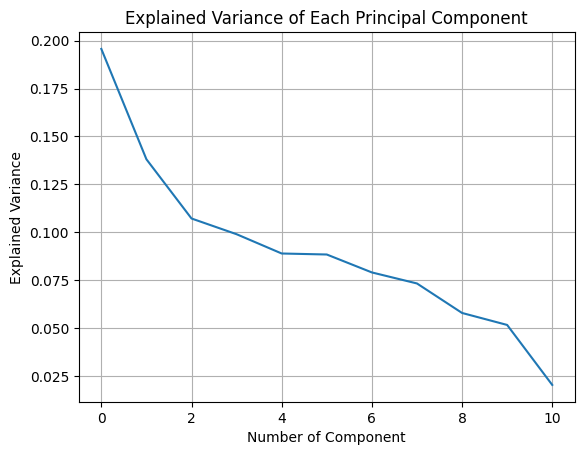

In [5]:
pca = PCA()
pca.fit(scaled_data.drop(['track_name'], axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Each Principal Component')
plt.grid()
plt.show()

In [33]:
# TODO: Findout the most reduced dimension which has a high cutoff explained variance. Write down the value of cut off and explain it.


با توجه به نمودار بالا به نظرم باید حداقل سه کامپونتنت اول که نمودار در آن‌ها تیز است و بخش زیادی از واریانس را توضیح می‌دهند انتخاب کرد. اما به هر حال سوال در بخش بعدی خواسته دو کامپوننت انتخاب کنیم و دو تا انتخاب می‌کنیم.

<div dir="rtl">
<h2>
خوشه‌بندی
</h2>
</div>

<div dir="rtl">
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی می‌کنید.

</div>

In [6]:
def cluster_kmeans(emb_vecs, n_clusters):
    """
    Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors
    
    n_clusters: int
        Number of clusters

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    emb_matrix = np.array(emb_vecs)

    # Randomly initialize centroids
    initial_centroids_idx = random.sample(range(len(emb_matrix)), n_clusters)
    centroids = emb_matrix[initial_centroids_idx, :]

    for _ in tqdm(range(100)):  # Adjust the number of iterations as needed
        # Compute distances between data points and centroids
        distances = np.sqrt(((emb_matrix - centroids[:, np.newaxis]) ** 2).sum(axis=2))

        # Assign each point to the closest centroid
        cluster_indices = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([emb_matrix[cluster_indices == k].mean(axis=0) for k in range(n_clusters)])

        # Check for convergence and break if converged
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, cluster_indices

<div dir="rtl">
 با استفاده از K-Means خوشه‌ها را ایجاد کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>

 نمودار silhouette score برای مقدار‌های مختلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
<br>
همچنین Within-Cluster Sum of Squares (WSS) را نیز محاسبه کرده و در نهایت این دو کار بهترین مقدار k  را بدست بیاورید.
</div>

 38%|███▊      | 38/100 [00:00<00:00, 212.04it/s]


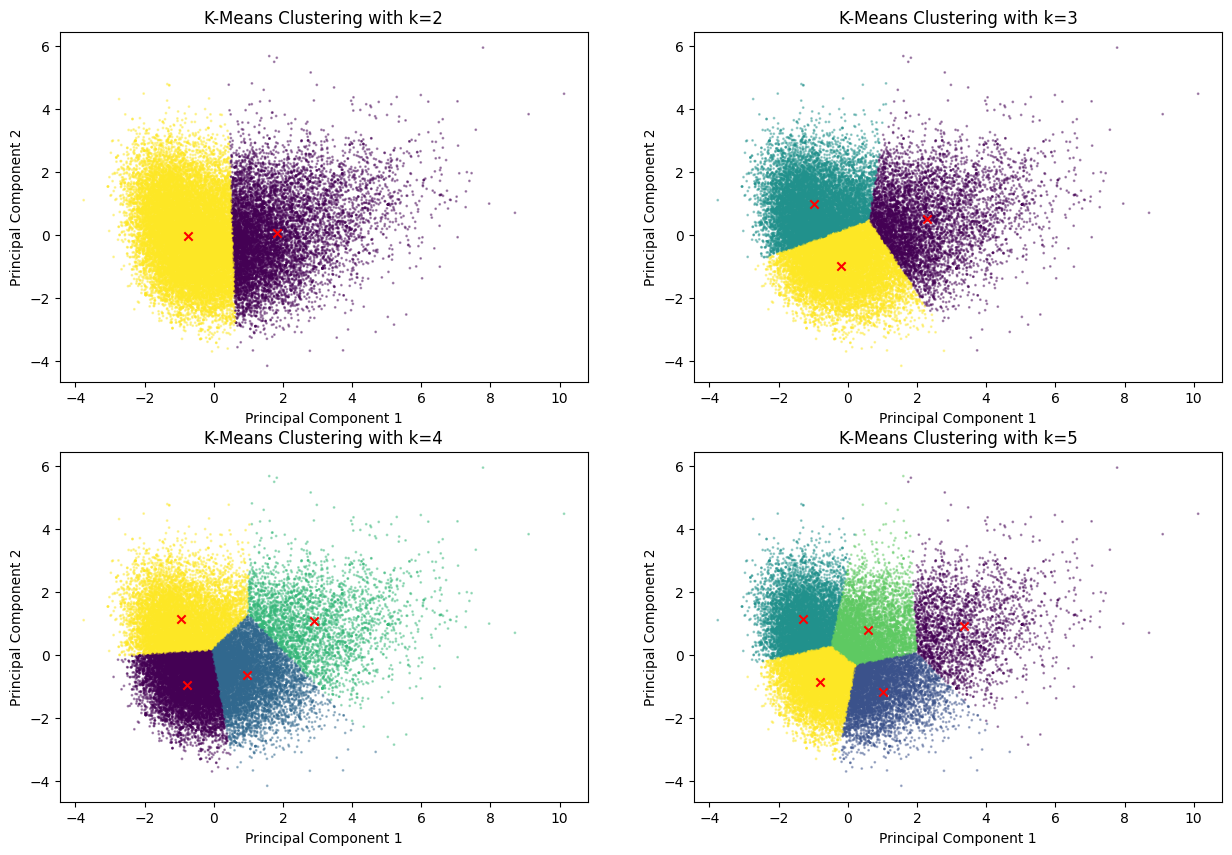

In [7]:
reduced_data = reduce_dimension(scaled_data.drop(['track_name'], axis=1), 2)

# Plot clusters for different k values
k_values = [2, 3, 4, 5]
plt.figure(figsize=(15, 10))

centroidss = []
cluster_indicess = []

for i, k in enumerate(k_values):
    centroids, cluster_indices = cluster_kmeans(reduced_data, k)
    centroidss.append(centroids)
    cluster_indicess.append(cluster_indices)
    plt.subplot(2, 2, i + 1)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_indices, cmap='viridis', marker='o', alpha=0.4, s=1)
    plt.scatter([c[0] for c in centroids], [c[1] for c in centroids], c='red', marker='x')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.show()

In [8]:
def wss_score(data, centroids, cluster_indices):
    wss = 0.0
    for i, centroid in enumerate(centroids):
        wss += np.sum((data[cluster_indices == i] - centroid) ** 2)
    return wss

from sklearn.metrics import silhouette_score as sk_silhouette_score  # sklearn's implementation

# Silhouette score implementation from scratch
def silhouette_score(data, cluster_indices):
    num_samples = data.shape[0]
    unique_clusters = np.unique(cluster_indices)

    silhouette_scores = np.zeros(num_samples)

    for i in range(num_samples):
        same_cluster = (cluster_indices == cluster_indices[i])
        # Mean distance to points in the same cluster
        a = np.mean(np.sqrt(np.sum((data[i] - data[same_cluster])**2, axis=1)))

        # Mean distance to points in the next nearest cluster
        b = np.inf
        for cluster in unique_clusters:
            if cluster != cluster_indices[i]:
                other_cluster = (cluster_indices == cluster)
                d = np.mean(np.sqrt(np.sum((data[i] - data[other_cluster])**2, axis=1)))
                b = min(b, d)
        
        silhouette_scores[i] = (b - a) / max(a, b)

    return np.mean(silhouette_scores)

In [11]:
wss_scores = []
silhouette_scores = []

for i, k in enumerate(k_values):
    centroids, cluster_indices = centroidss[i], cluster_indicess[i]
    wss_scores.append(wss_score(reduced_data, centroids, cluster_indices))
    silhouette_scores.append(sk_silhouette_score(reduced_data, cluster_indices))

    # Print a few song names from each cluster for naming
    print(f"\nSongs in each cluster for k={k}:")
    for cluster_index in range(k):
        indices_in_cluster = np.where(cluster_indices == cluster_index)[0]
        songs_in_cluster = spotify_data.iloc[indices_in_cluster][['track_name', 'track_album_name', 'track_artist']]
        
        sample_songs = songs_in_cluster.sample(3)
        # sample_songs = songs_in_cluster.head(3)
        
        print(f"Cluster {cluster_index+1}:")
        for _, row in sample_songs.iterrows():
            print(f"Song: {row['track_name']}, Album: {row['track_album_name']}, Artist: {row['track_artist']}")
        print()


Songs in each cluster for k=2:
Cluster 1:
Song: La ragazza con il cuore di latta, Album: La ragazza con il cuore di latta, Artist: Irama
Song: Bubbly, Album: Coco, Artist: Colbie Caillat
Song: Был хулиганом, Album: Наркотик мой (Special Edition), Artist: StaFFord63

Cluster 2:
Song: A Crime To Remember, Album: Pop Evil, Artist: Pop Evil
Song: Pool Party, Album: Skin And Bones, Artist: Self Sabotage
Song: Mantém, Album: Mantém, Artist: WIU

Songs in each cluster for k=3:
Cluster 1:
Song: Orange, Album: Orange, Artist: Sophie Holohan
Song: Feel Like Makin' Love - 2015 Remaster, Album: Straight Shooter, Artist: Bad Company
Song: Tears, Album: Rhino Hi-Five: Force M.D.'s, Artist: Force M.D.'s

Cluster 2:
Song: Who We Are, Album: The Stories We Tell Ourselves, Artist: Nothing More
Song: Impossible, Album: James Arthur (Deluxe), Artist: James Arthur
Song: Bombai, Album: Bombai, Artist: Dyro

Cluster 3:
Song: Black Shaolin, Album: Black Shaolin, Artist: Prince Kane
Song: Fake Yeezys, Album: 

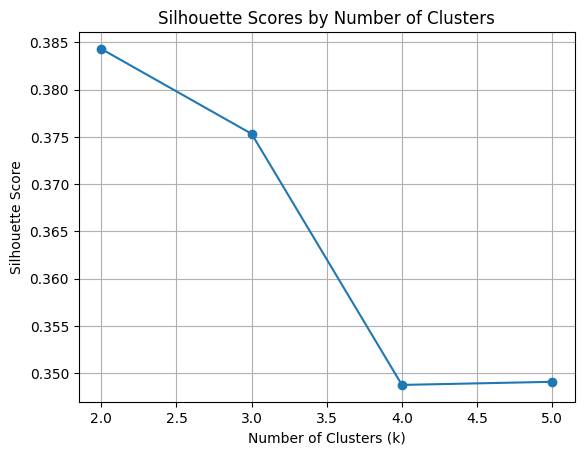

In [12]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores by Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

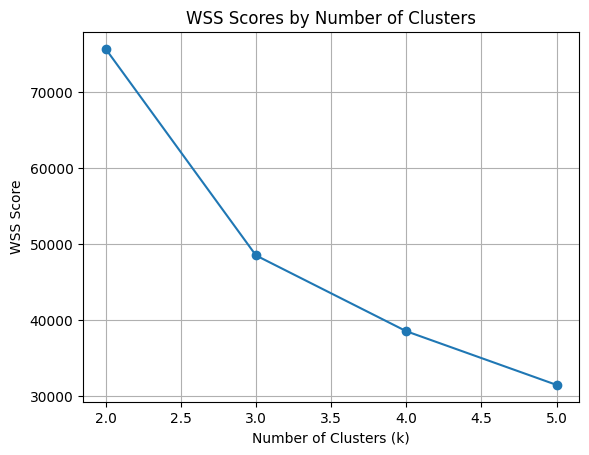

In [13]:
plt.plot(k_values, wss_scores, marker='o')
plt.title("WSS Scores by Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WSS Score")
plt.grid()
plt.show()

<div dir="rtl">
با استفاده از نمودارهای رسم شده توضیح دهید بهترین k برای انتخاب در داده ما با استفاده از الگوریتم K-Means چیست؟
چرا؟
</div>


به نظرم بهترین مقدار ممکن سه دسته است.
چرا که همان‌طور که در نمودار 
WSS
می‌بینیم نمودار بیشترین کاهش را تا 
k=3
دارد و پس از آن چندان کاهش میانگین‌فاصله‌ها چشمگیر نیست.

و امتیاز
Silhouette Score
هم که دوست داریم زیاد کنیم در نمودار می‌بینیم که از ۳ به ۴ یک افت محسوسی دارد و افزایش آن در ۵ چندان چشمگیر نیست. پس همان ۳ هم
WSS
را کم می‌کند و هم امتیاز
Silhouette
را بالا نگه می‌دارد.

<div dir="rtl">
<h2>
بررسی خروجی</h2>
</div>

<div dir="rtl">
در این قسمت برای اینکه ببینیم چقدر خوب خوشه بندی را انجام داده ایم, از یک روش sample check و نیز TSNE استفاده خواهیم کرد.

</div>

<div dir="rtl">
در ابتدا به صورت رندوم از هر خوشه دو اهنگ را انتخاب کرده (با توجه به اینکه در بخش اول بایستی اسم اهنگ را نیز نگه میداشتید) و ببینید واقعا این اهنگ ها به هم نزدیک هستند یا خیر.
نکته اینکه صرفا بررسی این عمل نمره دارد و نیازی به خیلی دقیق بودن خروجی نیست.
</div>

In [18]:
k = 3
centroids, cluster_indices = centroidss[k_values.index(k)], cluster_indicess[k_values.index(k)]

print(f"\nSongs in each cluster:")
for cluster_index in range(k):
    indices_in_cluster = np.where(cluster_indices == cluster_index)[0]
    songs_in_cluster = spotify_data.iloc[indices_in_cluster][['track_name', 'track_album_name', 'track_artist']]
    
    sample_songs = songs_in_cluster.sample(2)
    
    print(f"Cluster {cluster_index+1}:")
    for _, row in sample_songs.iterrows():
        print(f"Song: {row['track_name']}, Album: {row['track_album_name']}, Artist: {row['track_artist']}")
    print()


Songs in each cluster:
Cluster 1:
Song: Canción del encantamiento, Album: Enredados (Rapunzel) OST, Artist: Carmen López
Song: Never Let Go - Radio Edit, Album: Never Let Go, Artist: Culture Code

Cluster 2:
Song: Already Dead, Album: Already Dead, Artist: Hollywood Undead
Song: Day Or Night, Album: Day Or Night, Artist: Mike Williams

Cluster 3:
Song: Burnin' for You, Album: Fire of Unknown Origin, Artist: Blue Öyster Cult
Song: 8 Minutes to Sunrise, Album: Jill Scott Collaborations, Artist: Common



## قضاوت دسته‌بندی
آهنگ‌های دسته‌ها تقریبا مشابه هستند.
در دسته‌ی اول معمولا
soundtrackها
و آهنگ‌های کلاسیک و در کل آهنگ‌هایی با تمپو آرام را قرار داده.

در دسته‌ی دوم عمدتا
heavy metal
و آهنگ‌هایی با تمپوی سریع را قرار داده.

نهایتا دسته‌ی سوم کمی متنوع‌تر است (همان‌طور که در نمودار هم میبینیم کمی گسترده است) در این دسته آهنگ‌هایی با تمپوی متوسط و متنوع وجود دارد. که پاپ و گاهی هیپ‌هاپ هستند.

<div dir="rtl">
با استفاده از این T-SNE و کاهش ابعاد به 2 بعد نشان دهید که ایا خوشه بنده به خوبی انجام شده است یا خیر.

</br>
در صورت پیاده سازی تابع tsne  از ابتدا, نمره ی امتیازی به شما تعلق خواهد گرفت.
</div>

In [19]:
# Applying pre-implemented t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, verbose=1, n_iter=400)
tsne_results = tsne.fit_transform(scaled_data.drop(['track_name'], axis=1))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 32833 samples in 0.016s...
[t-SNE] Computed neighbors for 32833 samples in 6.669s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32833
[t-SNE] Computed conditional probabilities for sample 2000 / 32833
[t-SNE] Computed conditional probabilities for sample 3000 / 32833
[t-SNE] Computed conditional probabilities for sample 4000 / 32833
[t-SNE] Computed conditional probabilities for sample 5000 / 32833
[t-SNE] Computed conditional probabilities for sample 6000 / 32833
[t-SNE] Computed conditional probabilities for sample 7000 / 32833
[t-SNE] Computed conditional probabilities for sample 8000 / 32833
[t-SNE] Computed conditional probabilities for sample 9000 / 32833
[t-SNE] Computed conditional probabilities for sample 10000 / 32833
[t-SNE] Computed conditional probabilities for sample 11000 / 32833
[t-SNE] Computed conditional probabilities for sample 12000 / 32833
[t-SNE] Computed conditional probabilities for sam

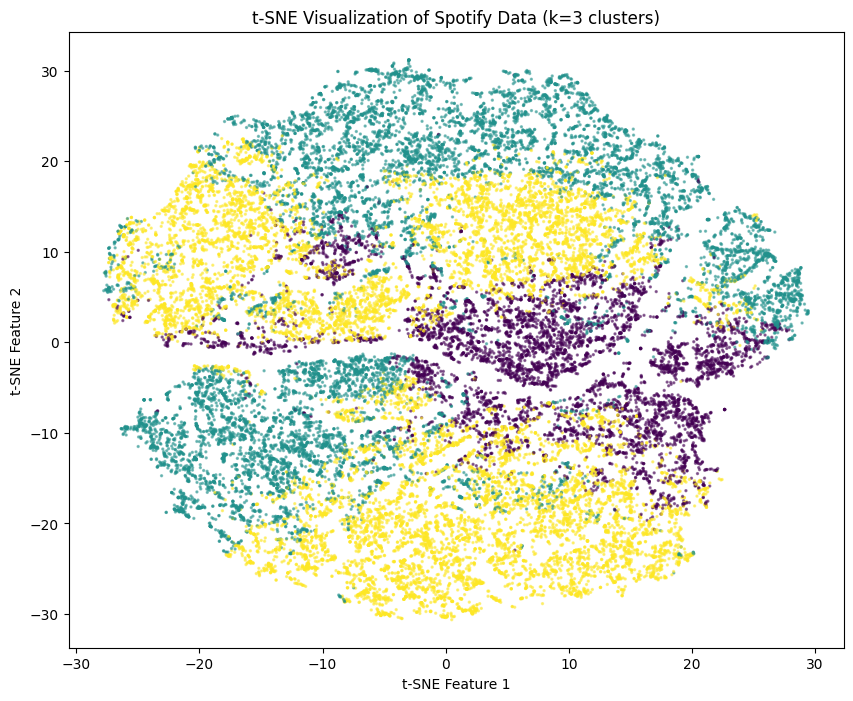

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_indices, cmap='viridis', marker='o', alpha=0.5, s=2)
plt.title("t-SNE Visualization of Spotify Data (k=3 clusters)")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()


هرچند دسته‌بندی ما نسبت به
TSNE
ایده‌آل نیست ولی به نظر می‌رسد که خوشه‌بندی ما به خوبی انجام شده است.
در نمودار خیلی دسته‌ها در هم نیستند و نسبتا جاهایی که جدا شده‌اند ما هم رنگ‌های متفاوتی زدیم.

In [ ]:
# Bonus TODO: Implement TSNE from scratch


کد زیر با کمک پیاده‌سازی‌هایی در گیت‌هاب پیاده شده و ضمنا نسبت به تابع کتابخانه‌ی
sklearn 
عملکرد خوبی ندارد چرا که داده‌های ما بسیار حجیم و زیاد هستند.

In [10]:
# ماتریس کرنل گاوسی
def Hbeta(D, beta):
    P = np.exp(-D * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    return H, P / sumP

# محاسبه ماتریس احتمال شرطی
def x2p(X, perplexity):
    tol = 1e-5
    (n, _) = X.shape
    D = np.square(X[:, np.newaxis, :] - X[np.newaxis, :, :]).sum(axis=2)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    
    print("Computing pairwise distances...")
    for i in tqdm(range(n)):
        betamin = -np.inf
        betamax = np.inf
        H, thisP = Hbeta(D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))], beta[i])
        Hdiff = H - np.log(perplexity)
        
        while np.abs(Hdiff) > tol:
            if Hdiff > 0:
                betamin = beta[i].copy()
                beta[i] = beta[i] * 2.
            else:
                betamax = beta[i].copy()
                beta[i] = (beta[i] + betamin) / 2.
            H, thisP = Hbeta(D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))], beta[i])
            Hdiff = H - np.log(perplexity)

        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    return P

def pca(X, no_dims=50):
    pca = PCA(n_components=no_dims)
    return pca.fit_transform(X)

def tsne(X, no_dims=2, initial_dims=50, perplexity=30.0):
    X = pca(X, initial_dims)
    (n, _) = X.shape
    P = x2p(X, perplexity)
    P = P + P.T
    P = P / np.sum(P)
    P = P * 4
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    print("Performing t-SNE:")
    for iter in range(200):
        sum_Y = np.sum(np.square(Y), axis=1)
        num = 1 / (1 + np.add(np.add(-2 * np.dot(Y, Y.T), sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0
        Q = num / np.sum(num)
        PQdiff = P - Q

        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQdiff[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), axis=0)

        gains = (gains + .2) * ((dY > 0) != (iY > 0)) + (gains * .8) * ((dY > 0) == (iY > 0))
        gains[gains < .01] = .01
        iY = .5 * iY - 500 * dY * gains
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, axis=0), (n, 1))

        if iter % 20 == 0:
            print(f"Iteration {iter}")

    return Y

In [12]:
tsne_results = tsne(scaled_data.drop(['track_name'], axis=1).sample(1000), no_dims=2, initial_dims=10)

Computing pairwise distances...


  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/8h/6yryd0955_99lnwl_1lxvktr0000gn/T/ipykernel_20255/1848725262.py:5: RuntimeWarning: invalid value encountered in divide
  H = np.log(sumP) + beta * np.sum(D * P) / sumP
/var/folders/8h/6yryd0955_99lnwl_1lxvktr0000gn/T/ipykernel_20255/1848725262.py:6: RuntimeWarning: invalid value encountered in divide
  return H, P / sumP
  2%|▎         | 25/1000 [00:00<00:03, 245.89it/s]/var/folders/8h/6yryd0955_99lnwl_1lxvktr0000gn/T/ipykernel_20255/1848725262.py:3: RuntimeWarning: invalid value encountered in multiply
  P = np.exp(-D * beta)
100%|██████████| 1000/1000 [00:02<00:00, 478.58it/s]


Performing t-SNE:
Iteration 0
Iteration 20
Iteration 40
Iteration 60
Iteration 80
Iteration 100
Iteration 120
Iteration 140
Iteration 160
Iteration 180
